In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from fastai.tabular import add_datepart
import numpy as np
#data = pd.read_csv('../data/train.csv')
import seaborn as sns
import matplotlib.pyplot as plt




In [26]:
data = pd.read_csv('../data/train_con_features_encoded_2.csv')
#data = pd.read_csv('../data/train_con_features_2.csv')

In [144]:
data_original = pd.read_csv('../data/train.csv')


In [27]:
data.head()

,Unnamed: 0,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,...,precio_prom_ciudad_propiedad_hab,precio_prom_ciudad_propiedad_banos,precio_prom_ciudad_propiedad_metroscubiertos,precio_prom_ciudad_propiedad_antiguedad,relacion_palabras_descripcion,anio,mes,tipodepropiedad_cb,ciudad_cb,provincia_cb
0,0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,...,2.586801e+06,3.104647e+06,2.002567e+06,3.566581e+06,0.000000,2015,8,2.763765e+06,3.384582e+06,3.471689e+06
1,1,53461,10.000000,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,...,5.467246e+06,4.410121e+06,4.800429e+06,4.793198e+06,0.007968,2013,6,2.898908e+06,4.604780e+06,3.471689e+06
2,2,247984,5.000000,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,...,8.633364e+05,9.822079e+05,1.183333e+06,8.463781e+05,0.046957,2015,10,2.398159e+06,8.890818e+05,2.367701e+06
3,3,209067,1.000000,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,...,8.731875e+05,6.915500e+05,6.550000e+05,1.223333e+06,0.000000,2012,3,2.398159e+06,1.479134e+06,2.762459e+06
4,4,185997,10.000000,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,...,1.720811e+06,9.433832e+05,1.915379e+06,1.120927e+06,0.074108,2016,6,2.763765e+06,2.749654e+06,2.367701e+06


In [28]:
data[data.id==254099]

,Unnamed: 0,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,...,precio_prom_ciudad_propiedad_hab,precio_prom_ciudad_propiedad_banos,precio_prom_ciudad_propiedad_metroscubiertos,precio_prom_ciudad_propiedad_antiguedad,relacion_palabras_descripcion,anio,mes,tipodepropiedad_cb,ciudad_cb,provincia_cb
0,0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,...,2.586801e+06,3.104647e+06,2.002567e+06,3.566581e+06,0.0,2015,8,2.763765e+06,3.384582e+06,3.471689e+06


In [29]:
print(data[data.id==254099].precio)
print(data[data.id==254099].precio_prom_propiedad)

0    2273000.0
Name: precio, dtype: float64
0    2.763769e+06
Name: precio_prom_propiedad, dtype: float64


In [30]:
data['precio'].describe().apply(lambda x: format(x, 'f'))


count      240000.000000
mean      2530838.345896
std       2152551.797622
min        310000.000000
25%        952772.500000
50%       1850000.000000
75%       3390000.000000
max      12525000.000000
Name: precio, dtype: object

AttributeError: 'StrCategoryFormatter' object has no attribute 'set_scientific'

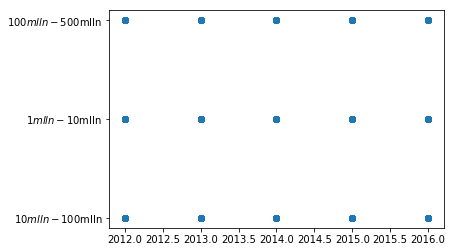

In [24]:
plt.scatter(x=data['anio'],y=data['precio'])
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()

In [40]:
bins=[-100000000,20000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,500000000]
choices =['$0-$200k','$200k-$1mlln','$1mll-$2mlln','$2mll-$3mlln','$3mll-$4mll','$4mlln-$5mlln','$5mlln-$6mlln','$6mlln-$7mlln','$7mlln-$8mlln','$8mlln-$9mlln','$9mlln-$10mlln','$10mlln-$50mlln']
data['rango_de_precio']=pd.cut(data['precio'],bins=bins,labels=choices)

In [41]:
data.head()

,Unnamed: 0,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,...,precio_prom_ciudad_propiedad_banos,precio_prom_ciudad_propiedad_metroscubiertos,precio_prom_ciudad_propiedad_antiguedad,relacion_palabras_descripcion,anio,mes,tipodepropiedad_cb,ciudad_cb,provincia_cb,rango_de_precio
0,0,254099,8.116114,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,...,3.104647e+06,2.002567e+06,3.566581e+06,0.000000,2015,8,2.763765e+06,3.384582e+06,3.471689e+06,$2mll-$3mlln
1,1,53461,10.000000,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,...,4.410121e+06,4.800429e+06,4.793198e+06,0.007968,2013,6,2.898908e+06,4.604780e+06,3.471689e+06,$3mll-$4mll
2,2,247984,5.000000,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,...,9.822079e+05,1.183333e+06,8.463781e+05,0.046957,2015,10,2.398159e+06,8.890818e+05,2.367701e+06,$1mll-$2mlln
3,3,209067,1.000000,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,...,6.915500e+05,6.550000e+05,1.223333e+06,0.000000,2012,3,2.398159e+06,1.479134e+06,2.762459e+06,$200k-$1mlln
4,4,185997,10.000000,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,...,9.433832e+05,1.915379e+06,1.120927e+06,0.074108,2016,6,2.763765e+06,2.749654e+06,2.367701e+06,$1mll-$2mlln


In [78]:
data_por_rango_de_precio = data.groupby(['anio','rango_de_precio'])['id'].count().reset_index()
data_por_rango_de_precio

,anio,rango_de_precio,id
0,2012,$200k-$1mlln,8407
1,2012,$1mll-$2mlln,6739
2,2012,$2mll-$3mlln,3567
3,2012,$3mll-$4mll,2174
4,2012,$4mlln-$5mlln,1066
5,2012,$5mlln-$6mlln,655
6,2012,$6mlln-$7mlln,374
7,2012,$7mlln-$8mlln,224
8,2012,$8mlln-$9mlln,164
9,2012,$9mlln-$10mlln,61


In [77]:
data_por_rango_de_precio_pivot = pd.pivot_table(data_por_rango_de_precio,index='anio',values='id',
               columns='rango_de_precio',aggfunc=np.sum,fill_value=0)

In [79]:
data_por_rango_de_precio_pivot.head()

rango_de_precio,$200k-$1mlln,$1mll-$2mlln,$2mll-$3mlln,$3mll-$4mll,$4mlln-$5mlln,$5mlln-$6mlln,$6mlln-$7mlln,$7mlln-$8mlln,$8mlln-$9mlln,$9mlln-$10mlln,$10mlln-$50mlln
anio,,,,,,,,,,,
2012,8407,6739,3567,2174,1066,655,374,224,164,61,103
2013,10458,8389,4722,2942,1556,984,559,307,214,105,150
2014,11496,11468,7102,4299,2465,1413,868,537,379,226,319
2015,12632,13989,9010,5872,3529,2199,1522,1032,660,386,639
2016,21510,24488,16587,11006,6739,4375,3248,2133,1438,973,1541


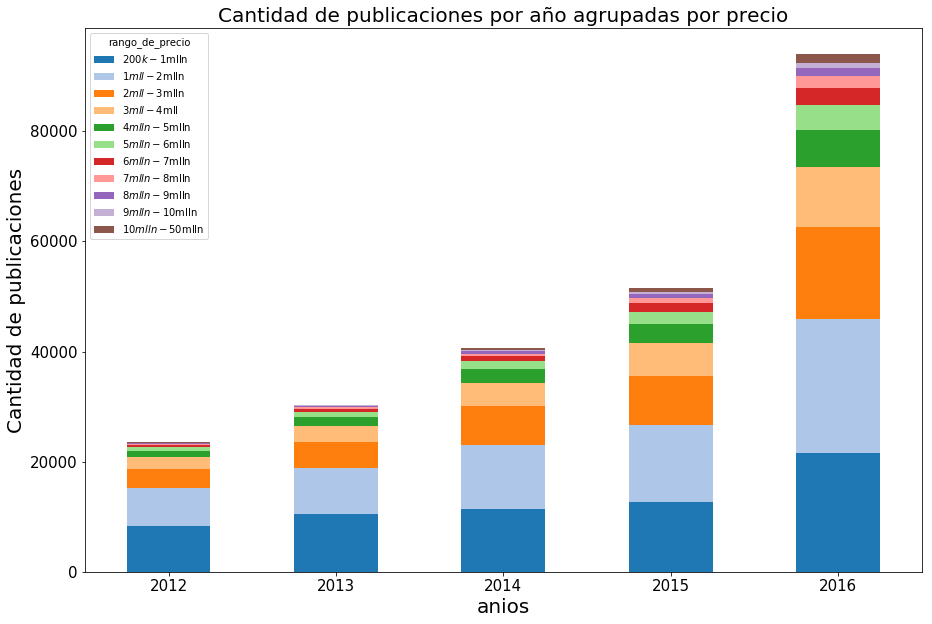

In [88]:
paired_colors = plt.cm.tab20(range(len(data_por_rango_de_precio_pivot)*5))
#
data_por_rango_de_precio_pivot.plot(kind= 'bar', stacked=True , rot=0, figsize=(15,10), fontsize=15,color=paired_colors)
plt.title('Cantidad de publicaciones por año agrupadas por precio', fontsize=20);
plt.xlabel('anios', fontsize=20);
plt.ylabel('Cantidad de publicaciones', fontsize=20);

In [119]:
#data_por_rango_de_tipo_de_prop_precio = data_original.groupby(['fechaYear','ciudad','tipodepropiedad'])['precio'].agg({'count':np.sum,'mean':np.mean}).reset_index()
data_por_rango_de_tipo_de_prop_precio = data_original.groupby(['fechaYear','ciudad','tipodepropiedad'])['id'].count().reset_index()

data_por_rango_de_tipo_de_prop_precio

,fechaYear,ciudad,tipodepropiedad,id
0,2012,Acambay,Casa,1
1,2012,Acapulco de Juárez,Apartamento,180
2,2012,Acapulco de Juárez,Casa,82
3,2012,Acapulco de Juárez,Casa en condominio,67
4,2012,Acapulco de Juárez,Casa uso de suelo,2
...,...,...,...,...
7699,2016,Zumpango,Casa en condominio,3
7700,2016,Zumpango,Terreno,2
7701,2016,otra,Apartamento,4
7702,2016,áutlán de Navarro,Casa,1


In [121]:
data_por_rango_de_tipo_de_prop_precio[data_por_rango_de_tipo_de_prop_precio.id < 5 ]

,fechaYear,ciudad,tipodepropiedad,id
0,2012,Acambay,Casa,1
4,2012,Acapulco de Juárez,Casa uso de suelo,2
5,2012,Acapulco de Juárez,Edificio,2
6,2012,Acapulco de Juárez,Oficina comercial,1
9,2012,Acolman,Apartamento,4
...,...,...,...,...
7699,2016,Zumpango,Casa en condominio,3
7700,2016,Zumpango,Terreno,2
7701,2016,otra,Apartamento,4
7702,2016,áutlán de Navarro,Casa,1


In [123]:
data_por_rango_de_tipo_de_prop_precio_pivot = pd.pivot_table(data_por_rango_de_tipo_de_prop_precio,index='fechaYear',values='id',
               columns=['tipodepropiedad','ciudad'],aggfunc=np.sum,fill_value=0)

In [124]:
data_por_rango_de_tipo_de_prop_precio_pivot

tipodepropiedad Apartamento                                               \
ciudad              Acajete Acambay Acapulco de Juárez Acateno Acatzingo   
fechaYear                                                                  
2012                      0       0                180       0         0   
2013                      0       1                211       0         0   
2014                      0       0                295       0         0   
2015                      0       0                252       0         0   
2016                      1       0                560       1         1   

tipodepropiedad                                                ...   Villa  \
ciudad          Acolman Actopan Aguascalientes Ahome Altamira  ... Timucuy   
fechaYear                                                      ...           
2012                  4       0              5     0        1  ...       0   
2013                  0       1             25     0        3  ...       0   
2014                  0       0              7     1        2  ...       0   
2015                  0       0              3     1        4  ...       0   
2016                  1       0              6     0       10  ...       1   

tipodepropiedad                                                        \
ciudad          Tizimín Tlajomulco de Zúñiga Tlalpan Torreón Tzucacab   
fechaYear                                                               
2012                  0                    0       0       0        0   
2013                  0                    0       0       0        0   
2014                  0                    0       0       0        0   
2015                  0                    0       1       1        1   
2016                  1                    1       0       0        0   

tipodepropiedad                                                  
ciudad          Veracruz Yautepec Zapopan Zihuatanejo de Azueta  
fechaYear                                                        
2012                   0        1       1                     0  
2013                   0        0       0                     1  
2014                   0        0       0                     0  
2015                   0        0       2                     1  
2016                   1        0       1                     1  

[5 rows x 3191 columns]

KeyboardInterrupt: 

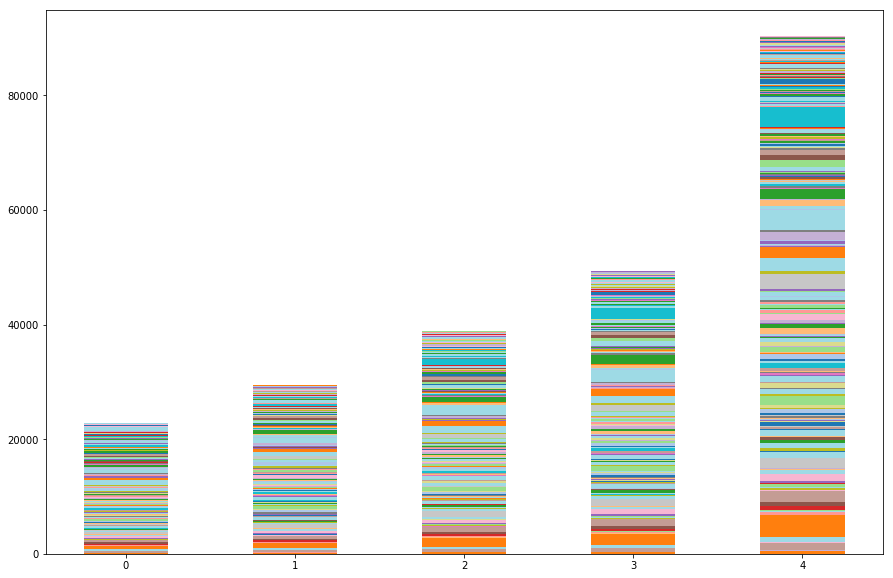

In [125]:
paired_colors = plt.cm.tab20(range(len(data_por_rango_de_precio_pivot)*5))
#
data_por_rango_de_tipo_de_prop_precio_pivot.plot(kind= 'bar', stacked=True , rot=0, figsize=(15,10), fontsize=15,color=paired_colors)
plt.title('Cantidad de publicaciones por año agrupadas por precio', fontsize=20);
plt.xlabel('anios', fontsize=20);
plt.ylabel('Cantidad de publicaciones', fontsize=20);

In [127]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (1.5  * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print (lower_bound)
    print (upper_bound)
 
    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

data = remove_outlier(data,"precio")

-2703068.75
7045841.25


In [128]:
data['precio'].describe().apply(lambda x: format(x, 'f')).to_frame()


,precio
count,228436.000000
mean,2201681.589347
std,1582963.707301
min,310000.000000
25%,920000.000000
50%,1750000.000000
75%,3100000.000000
max,7045000.000000


In [5]:
data[['id','precio','precio_prom_ciudad','precio_prom_propiedad','precio_prom_ciudad_propiedad_hab']].head()

,id,precio,precio_prom_ciudad,precio_prom_propiedad,precio_prom_ciudad_propiedad_hab
0,254099,2273000.0,3.384659e+06,2.763769e+06,2.586801e+06
1,53461,3600000.0,4.605869e+06,2.898927e+06,5.467246e+06
2,247984,1200000.0,8.870115e+05,2.398158e+06,8.633364e+05
3,209067,650000.0,1.472305e+06,2.398158e+06,8.731875e+05
4,185997,1150000.0,2.749675e+06,2.763769e+06,1.720811e+06


In [6]:
print(data[data.id==254099].precio_prom_ciudad_propiedad_hab)

0    2.586801e+06
Name: precio_prom_ciudad_propiedad_hab, dtype: float64


In [7]:
data_original[data_original.id==254099]

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0


In [56]:
paired_colors = plt.cm.tab10(range(len(data_por_rango_de_precio)))

data_por_rango_de_precio.sort_values(ascending=True).plot(kind='bar',stacked=True, rot=0, figsize=(11,9),  alpha = 0.95 ,fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.5)

TypeError: sort_values() missing 1 required positional argument: 'by'

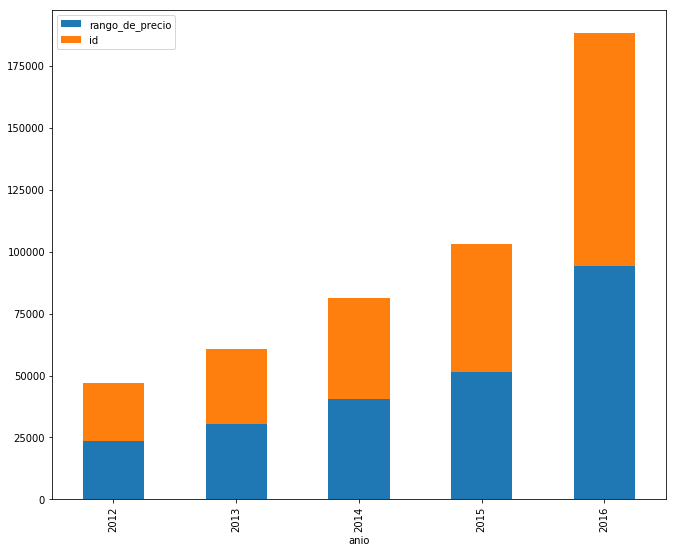

In [75]:
#anio	rango_de_precio	id
x= data[['anio','rango_de_precio','id']]
y= x.set_index('anio')
z= y.groupby(['anio']).count()

z.plot.bar(stacked=True,figsize=(11,9))

In [8]:
data_original[(data_original.tipodepropiedad=='Apartamento')]
#and (data_original.provincia=='Distrito Federal')

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300612,-99.148475,2014-03-18 00:00:00,0.0,0.0,0.0,0.0,1.0,1100000.0
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,9010.0,NaN,NaN,2014-01-06 00:00:00,0.0,0.0,0.0,1.0,1.0,310000.0
11,103293,"departamento en venta, san pedro garza garcia,...","departamento nuevo ,256 m2 de construccion,un ...",Apartamento,NaN,San Pedro Garza García,Nuevo León,NaN,3.0,2.0,...,325095.0,NaN,NaN,2014-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,7200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239980,267455,departamentos en renta torres palmira,"departamento en venta avenida palmira , san lu...",Apartamento,NaN,San Luis Potosí,San luis Potosí,1.0,2.0,NaN,...,87713.0,16.754800,-93.094700,2016-12-03 00:00:00,0.0,0.0,0.0,0.0,0.0,3386400.0
239986,41090,excelete torre de departamentos en lomas 4ta s...,<p>exclusiva torre de departamentos en venta e...,Apartamento,NaN,San Luis Potosí,San luis Potosí,0.0,3.0,2.0,...,343015.0,NaN,NaN,2013-09-07 00:00:00,0.0,0.0,0.0,0.0,0.0,2079000.0
239991,137337,departamento residencial coyuya,"departamento ubicado en planta baja, con excel...",Apartamento,Coyuya 200,Iztacalco,Distrito Federal,20.0,2.0,1.0,...,24118.0,19.403309,-99.119023,2015-03-14 00:00:00,0.0,0.0,0.0,1.0,1.0,1450000.0
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,...,50003995.0,NaN,NaN,2015-03-03 00:00:00,0.0,0.0,0.0,0.0,0.0,3400000.0


In [9]:
2.763769e+06	

2763769.0

In [10]:
data_original[(data_original.provincia=='Distrito Federal') & (data_original.ciudad=='Benito Juárez')].groupby(['ciudad','tipodepropiedad']).mean()['precio'].to_frame()

precio
ciudad        tipodepropiedad                            
Benito Juárez Apartamento                    2.917781e+06
              Bodega comercial               6.311538e+06
              Casa                           4.870943e+06
              Casa en condominio             5.264334e+06
              Casa uso de suelo              6.109857e+06
              Departamento Compartido        2.681300e+06
              Duplex                         5.800000e+06
              Edificio                       7.047896e+06
              Inmuebles productivos urbanos  6.480000e+06
              Local Comercial                2.768940e+06
              Local en centro comercial      1.580000e+06
              Nave industrial                6.200000e+06
              Oficina comercial              4.047769e+06
              Otros                          3.471143e+06
              Quinta Vacacional              2.014452e+06
              Terreno                        6.966709e+06
              Terreno comercial              6.815550e+06
              Villa                          2.225000e+06

In [11]:
data_original[(data_original.provincia=='Distrito Federal') & (data_original.ciudad=='Benito Juárez')]

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
13,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,NaN,0.0,...,50003995.0,19.374895,-99.149519,2015-03-31 00:00:00,0.0,0.0,0.0,0.0,0.0,3000000.0
17,73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.0,3.0,2.0,...,50003995.0,NaN,NaN,2016-10-30 00:00:00,0.0,0.0,0.0,1.0,1.0,4750000.0
52,244353,NaN,"departamento nuevo, 98m2 ,interior, 2 recamara...",Apartamento,ILLINOIS 31 602,Benito Juárez,Distrito Federal,0.0,2.0,2.0,...,23569.0,19.386026,-99.179459,2012-10-16 00:00:00,0.0,0.0,0.0,0.0,0.0,2100000.0
55,237577,departamento en venta en benito juárez,"excelente ubicación, amplios espacios, muy ilu...",Apartamento,JUAN SANCEHZ AZCONA,Benito Juárez,Distrito Federal,6.0,3.0,2.0,...,NaN,NaN,NaN,2012-05-15 00:00:00,0.0,0.0,0.0,0.0,0.0,4050000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239936,202283,casa en condominio en venta - san,casa en condominio en venta de 20 m2 de contru...,Casa en condominio,sagredo 13,Benito Juárez,Distrito Federal,0.0,2.0,3.0,...,23575.0,19.371391,-99.187125,2016-06-06 00:00:00,0.0,0.0,0.0,1.0,1.0,7900000.0
239967,84654,departamento en venta alamos,hermoso departamento en venta en colonia álamo...,Apartamento,Aragon 175,Benito Juárez,Distrito Federal,5.0,2.0,1.0,...,23540.0,19.393552,-99.138960,2016-12-27 00:00:00,0.0,0.0,0.0,1.0,1.0,1800000.0
239971,2747,"departamento exclusivo para tu familia, vive b...","www. \n3 recamaras, 2 baños \n2 autos \nentreg...",Apartamento,TOKIO,Benito Juárez,Distrito Federal,4.0,3.0,2.0,...,50003995.0,19.367193,-99.153030,2016-12-19 00:00:00,0.0,0.0,0.0,1.0,1.0,3750000.0
239973,149503,departamento en venta en villa de cortes,últimos departamentos en preventa dentro de ex...,Apartamento,Pérez de León 61,Benito Juárez,Distrito Federal,1.0,2.0,1.0,...,23548.0,NaN,NaN,2013-02-05 00:00:00,0.0,0.0,0.0,1.0,1.0,1260000.0


In [12]:
data.dtypes

Unnamed: 0                                        int64
id                                                int64
antiguedad                                      float64
habitaciones                                    float64
garages                                         float64
banos                                           float64
metroscubiertos                                 float64
metrostotales                                   float64
idzona                                          float64
lat                                             float64
lng                                             float64
piscina                                         float64
precio                                          float64
cantidad_amenities                              float64
relacion_metros                                 float64
metros_por_habitacion                           float64
metros_por_bano                                 float64
metros_por_amenities                            

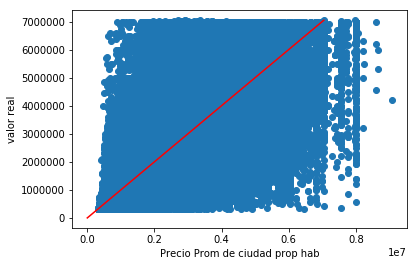

In [141]:
# Build a plot
plt.scatter(data.precio_prom_ciudad_propiedad_hab, data.precio)
plt.xlabel('Precio Prom de ciudad prop hab')
plt.ylabel('valor real')

# Se agrega linea de predicción
diagonal = np.linspace(0, np.max(data.precio), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'piscina', 'centroscomercialescercanos', 'precio', 'cantidad_amenities',
       'relacion_metros', 'metros_por_habitacion', 'metros_por_bano',
       'metros_por_amenities', 'bano_por_habitacion', 'garages_por_habitacion',
       'precio_prom_ciudad', 'precio_prom_propiedad',
       'cantidad_palabras_descripcion', 'relacion_palabras_descripcion',
       'ciudad_turistica_top15', 'anio', 'mes', 'tipodepropiedad_cb',
       'ciudad_cb', 'provincia_cb'],
      dtype='object')

In [17]:
predictor_cols = [ 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales',  'gimnasio',
       'piscina', 'centroscomercialescercanos', 'cantidad_amenities',
       'relacion_metros', 'metros_por_habitacion', 'metros_por_bano',
       'metros_por_amenities', 'bano_por_habitacion', 'garages_por_habitacion',
       'precio_prom_ciudad', 'precio_prom_propiedad','precio_prom_ciudad_propiedad_hab',
       'cantidad_palabras_descripcion', 'relacion_palabras_descripcion',
       'ciudad_turistica_top15', 'anio', 'mes', 'tipodepropiedad_cb',
       'ciudad_cb', 'provincia_cb']
#train_X = data[predictor_cols]


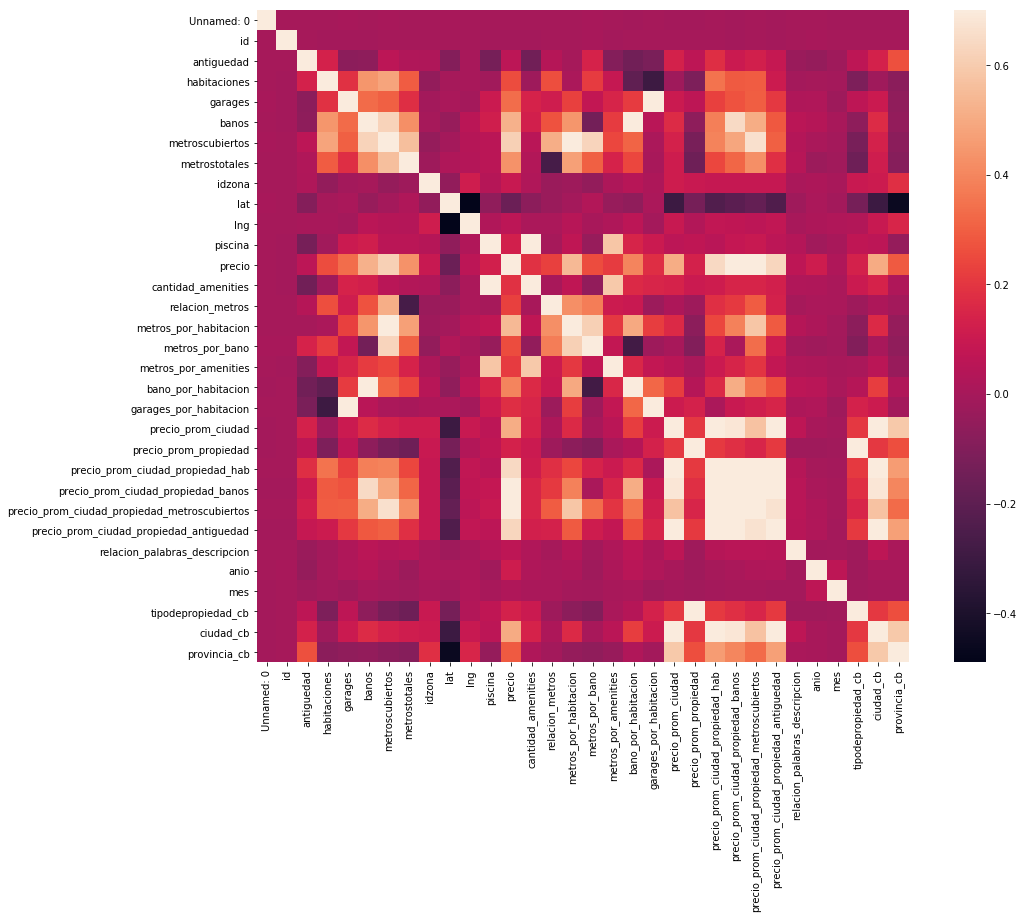

In [129]:


matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=0.7, square=True)

 luego de analizar la matriz de correlacion me quedo con estos features (leve mejora)


In [121]:
predictor_cols = ["antiguedad","habitaciones", "garages","banos","metroscubiertos","metrostotales", "gimnasio", 
                  "usosmultiples", "piscina", "escuelascercanas", "centroscomercialescercanos",
                  "fechaYear", "fechaMonth",
                  "fechaWeek", "fechaDay", 
                  #"fechaDayofweek", 
                  #"fechaDayofyear",
                  #"fechaElapsed",            
                  "es_Apartamento", "es_Casa_en_condominio", "es_Casa", "es_Terreno",
                  "es_Garage",
                  "seguridad_descripcion", "moderno_descripcion", "hermoso_descripcion", "estado_descripcion", 
                  "seguridad_titulo", "moderno_titulo", "hermoso_titulo", "estado_titulo",
                  "relacion_palabras_descripcion", "cantidad_palabras_descripcion",
                  "provincia_top5", "es_ciudad_capital", "ciudad_turistica_top15", "precio_prom_ciudad"                 
                 ]




In [83]:
interesting_variables = matrix['precio'].sort_values(ascending=False)
# Filter out the target variables (SalePrice) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.10]
interesting_variables = interesting_variables[interesting_variables.index != 'precio']
interesting_variables

precio_prom_ciudad_propiedad_metroscubiertos    0.890887
precio_prom_ciudad_propiedad_banos              0.757531
precio_prom_ciudad_propiedad_hab                0.673798
precio_prom_ciudad_propiedad_antiguedad         0.665393
metroscubiertos                                 0.582089
precio_prom_ciudad                              0.536478
ciudad_cb                                       0.535442
metros_por_habitacion                           0.518394
banos                                           0.488097
metrostotales                                   0.431865
bano_por_habitacion                             0.365318
provincia_cb                                    0.318053
garages                                         0.295493
metros_por_bano                                 0.249982
habitaciones                                    0.237289
relacion_metros                                 0.213312
metros_por_amenities                            0.194342
cantidad_amenities             

In [130]:
predictor_cols = [
"precio_prom_ciudad_propiedad_metroscubiertos",
"precio_prom_ciudad_propiedad_banos",
"precio_prom_ciudad_propiedad_hab",
"precio_prom_ciudad_propiedad_antiguedad",
"metroscubiertos",                  
"precio_prom_ciudad",               
"metros_por_habitacion",       
"banos",
"metrostotales", 
"bano_por_habitacion",    
"garages",
"metros_por_bano",
"habitaciones",
"relacion_metros",
"cantidad_amenities",
"precio_prom_propiedad",
"tipodepropiedad_cb",
"garages_por_habitacion",
"anio",
"piscina",



]
